# Import Libraries

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
data = load_iris()
X = data.data      # features
y = data.target    # labels

# Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Feature Scaling (Important in KNN)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Model (K = 5)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Prediction

In [7]:
y_pred = knn.predict(X_test)

# Accuracy

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Confusion Matrix

In [9]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Classification Report

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Finding Best K Value (Elbow Method)

In [11]:
error_rate = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, pred_k))

# Plot error_rate vs K

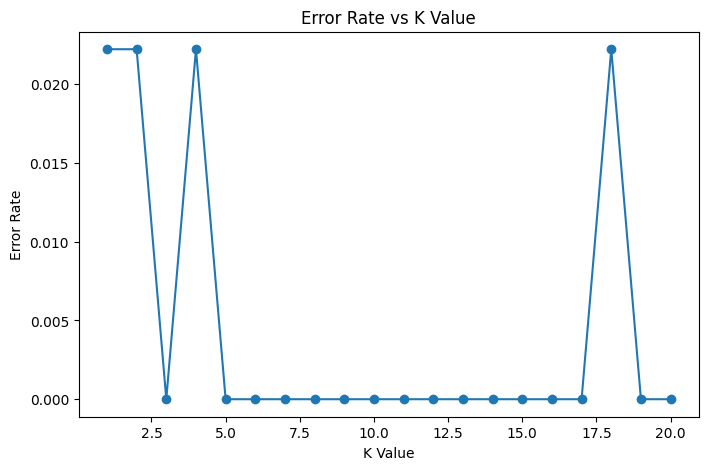

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1,21), error_rate, marker='o')
plt.title("Error Rate vs K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()